In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds
import os

import pandas as pd
import numpy as np
import matplotlib .pyplot as plt


In [2]:
dataset,info = tfds.load('cats_vs_dogs',with_info=True , as_supervised=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/23262 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/cats_vs_dogs/4.0.0.incomplete3U4CNH/cats_vs_dogs-train.tfrecord*...:   0%|…

Dataset cats_vs_dogs downloaded and prepared to /root/tensorflow_datasets/cats_vs_dogs/4.0.0. Subsequent calls will reuse this data.


In [3]:
class_names = info.features['label'].names
class_names

['cat', 'dog']

In [4]:
for i, example in enumerate(dataset['train']):
  image,label = example
  save_dir='./cats_vs_dogs/train/{}'.format(class_names[label])
  os.makedirs(save_dir,exist_ok = True)

  filename = save_dir + "/" + "{}_{}.jpg".format(class_names[label],i)
  tf.keras.preprocessing.image.save_img(filename,image.numpy())
  #print(save_dir)
  #break

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D , MaxPool2D , Flatten , Dense, Dropout , BatchNormalization
from tensorflow.keras.models import Sequential

In [6]:
datagen = ImageDataGenerator(
    rescale=1/255,
    validation_split=0.2,
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True
)


In [7]:
train_generator = datagen.flow_from_directory('/content/cats_vs_dogs/train',
                                              target_size=(150,150),
                                              batch_size=128,
                                              class_mode = 'binary',
                                              subset='training')

validation_generator = datagen.flow_from_directory('/content/cats_vs_dogs/train',
                                              target_size=(150,150),
                                              batch_size=128,
                                              class_mode = 'binary',
                                              subset='validation')

Found 18611 images belonging to 2 classes.
Found 4651 images belonging to 2 classes.


In [8]:
#build CNN MODEL
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Dropout, Flatten, Dense

model = Sequential()

# 1st layer CNN
model.add(Conv2D(32, kernel_size=3, activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D(2))
model.add(BatchNormalization())
model.add(Dropout(0.2))

# 2nd layer CNN
model.add(Conv2D(64, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(2))
model.add(BatchNormalization())
model.add(Dropout(0.2))

# 3rd layer CNN
model.add(Conv2D(128, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(2))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 74, 74, 32)        128       
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 74, 74, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0

In [10]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
history=model.fit(train_generator,epochs=10,validation_data = validation_generator)

Epoch 1/10
146/146 [==============================] - 172s 1s/step - loss: 2.0373 - accuracy: 0.6174 - val_loss: 0.9435 - val_accuracy: 0.5012
Epoch 2/10
146/146 [==============================] - 163s 1s/step - loss: 0.5643 - accuracy: 0.7186 - val_loss: 0.8699 - val_accuracy: 0.5472
Epoch 3/10
146/146 [==============================] - 159s 1s/step - loss: 0.5108 - accuracy: 0.7472 - val_loss: 1.2695 - val_accuracy: 0.5291
Epoch 4/10
146/146 [==============================] - 160s 1s/step - loss: 0.4859 - accuracy: 0.7671 - val_loss: 1.1147 - val_accuracy: 0.5663
Epoch 5/10
146/146 [==============================] - 171s 1s/step - loss: 0.4677 - accuracy: 0.7805 - val_loss: 0.4911 - val_accuracy: 0.7740
Epoch 6/10
146/146 [==============================] - 168s 1s/step - loss: 0.4484 - accuracy: 0.7881 - val_loss: 0.4714 - val_accuracy: 0.7837
Epoch 7/10
146/146 [==============================] - 160s 1s/step - loss: 0.4327 - accuracy: 0.7989 - val_loss: 0.4901 - val_accuracy: 0.7693

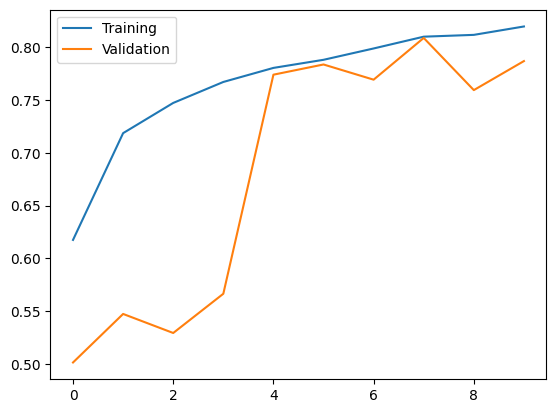

In [11]:
history.history
plt.plot(history.history['accuracy'],label='Training')
plt.plot(history.history['val_accuracy'],label='Validation')
plt.legend(['Training','Validation'])

In [12]:
#save model
model.save("cats_vs_dogs.h")

In [13]:
model_load=tf.keras.models.load_model('cats_vs_dogs.h')

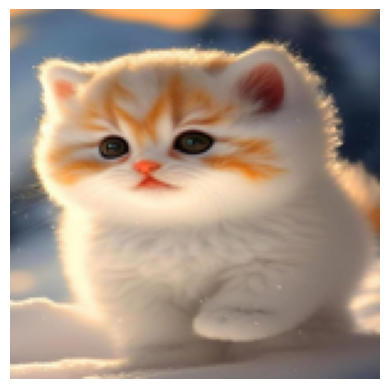

1/1 [==============================] - 0s 24ms/step
cat


In [26]:
import requests
from PIL import Image
from tensorflow.keras.preprocessing.image import img_to_array
import numpy as np

# Assuming 'model' has been loaded correctly

# Preprocessing
img_url = 'https://i.pinimg.com/736x/c1/3e/08/c13e086162b416616142b0c6b1c57050.jpg'

# Open the image using PIL
img = Image.open(requests.get(img_url, stream=True).raw).resize((150, 150))
# Display the image using matplotlib
plt.imshow(img)
plt.axis('off')  # Hide axis labels and ticks
plt.show()


# Convert PIL image to NumPy array
image_array = img_to_array(img)

img = np.expand_dims(image_array, axis=0)
# If needed, you can expand dimensions or perform further preprocessing
img = img / 255.0  # Normalize pixel values to the range [0, 1]

# Now, 'img' is ready for input to your model

# Make a prediction
prediction = model.predict(img)

# Set a threshold for classification (e.g., 0.5)
th = 0.5

# Convert the prediction to a binary value based on the threshold
predicted_class = int(prediction[0][0] > th)

# Assuming 'train_generator.class_indices' is a dictionary mapping class names to indices
# Reverse the dictionary to get a mapping from indices to class names
classes = {v: k for k, v in train_generator.class_indices.items()}

# Retrieve the class name for the predicted index
predicted_class_name = classes[predicted_class]

# 'predicted_class_name' now contains the name of the predicted class
print(predicted_class_name)



